## COVID-19
### South Korea

In [77]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import date, timedelta
import re
import json
import folium
import difflib
%matplotlib inline
#plt.style.use('fivethirtyeight')
sns.set()

##### gather data from https://github.com/jihoo-kim/Coronavirus-Dataset

In [78]:
df_patient = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Coronavirus-Dataset/master/patient.csv', parse_dates=['confirmed_date', 'released_date', 'deceased_date'])
df_patient['age'] = 2020 - df_patient['birth_year']
df_patient

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN


In [80]:
df_korea = df_patient.groupby('confirmed_date').size().reset_index()
df_korea.columns=['date', 'confirmed_new']
df_korea = df_korea.set_index('date')
df_korea['confirmed'] = np.cumsum(df_korea['confirmed_new'])
df_korea

,confirmed_new,confirmed
date,,
2020-01-20,1,1
2020-01-24,1,2
2020-01-26,1,3
2020-01-27,1,4
2020-01-30,3,7
2020-01-31,4,11
2020-02-01,1,12
2020-02-02,3,15
2020-02-04,1,16


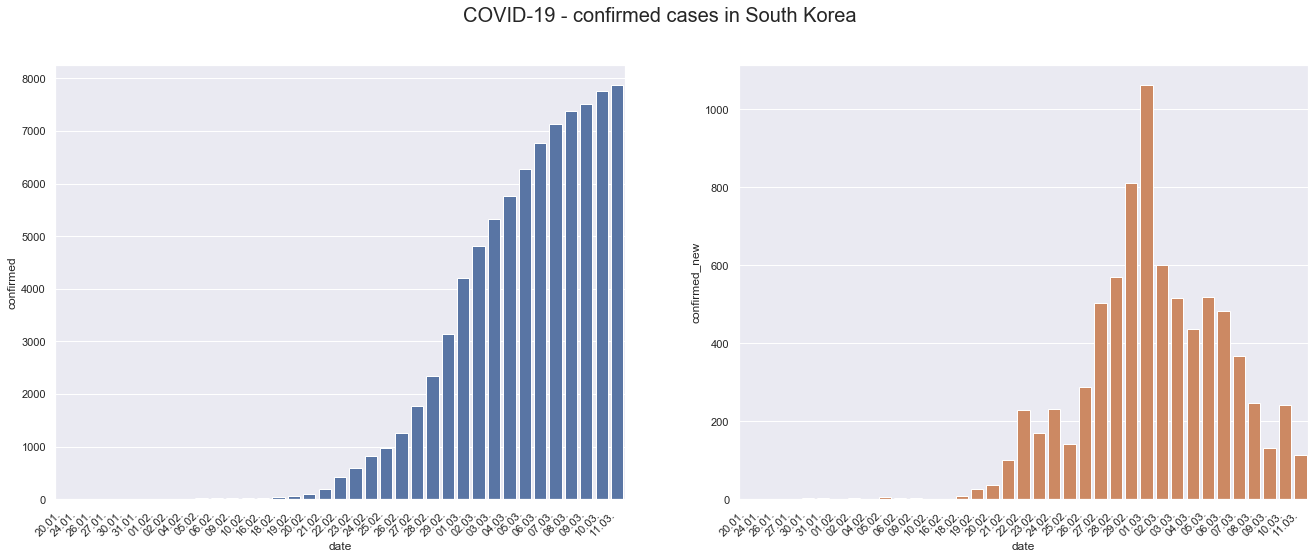

In [81]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
for i, ctype in enumerate(['confirmed', 'confirmed_new'], 1):
    plt.subplot(1,2,i)
    ax = sns.barplot(data=df_korea, x=df_korea.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_korea.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
_ = plt.suptitle('COVID-19 - confirmed cases in South Korea',fontsize=20)



In [53]:
df_patient.state.value_counts()

isolated    7777
released      56
deceased      36
Name: state, dtype: int64

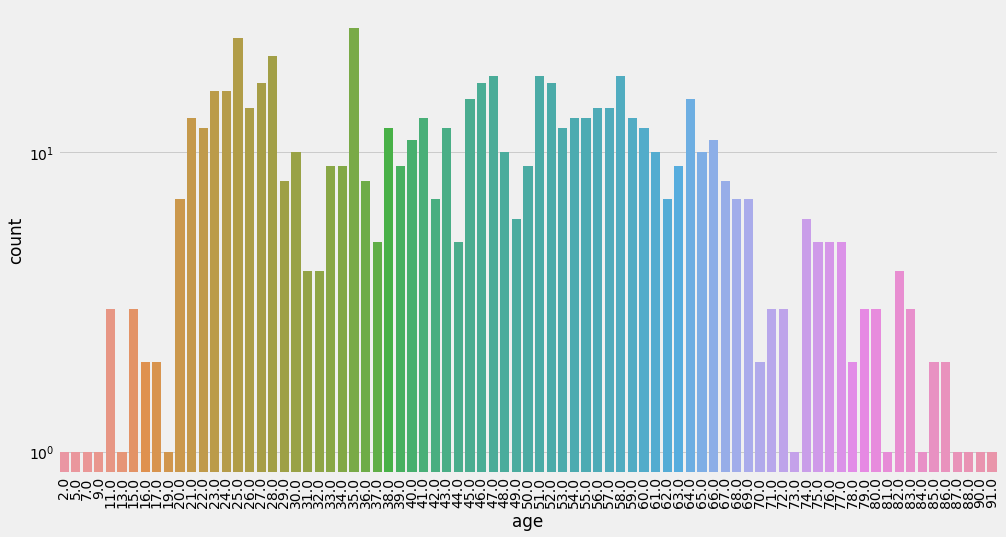

In [34]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df_patient['age'].dropna())
ax.set_yscale('log')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


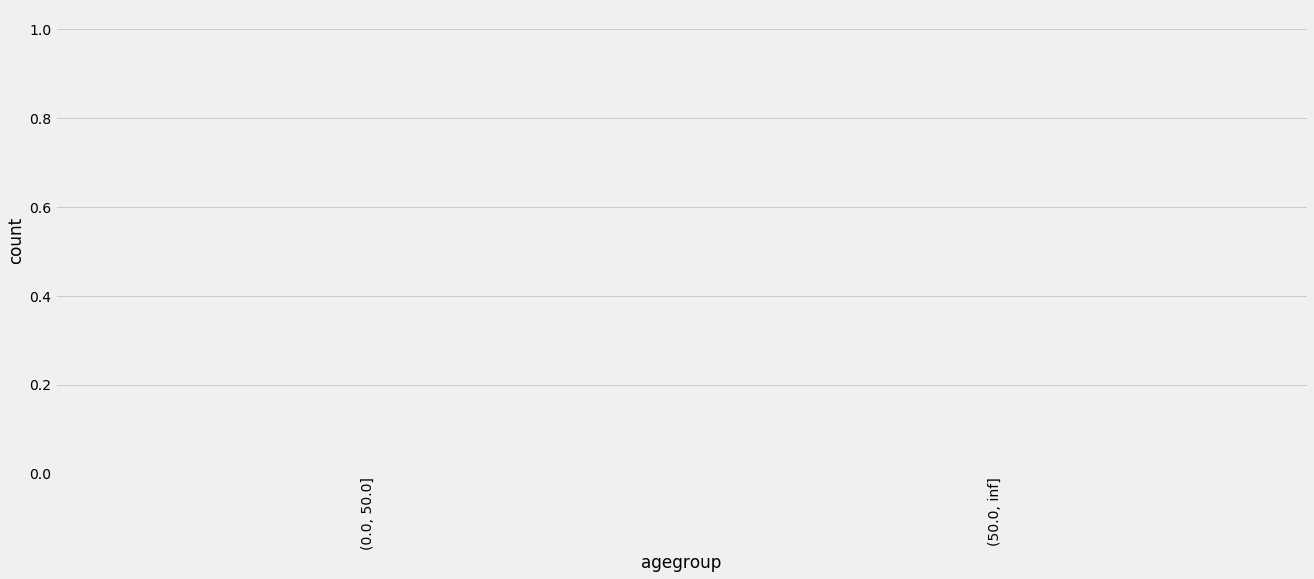

In [51]:
plt.figure(figsize=(20, 8))
plot_data = df_patient[(df_patient.state=='died') & (df_patient.age != np.nan)]
plot_data.loc[:,'agegroup']= pd.cut(plot_data['age'], bins = [0,50, np.inf])
ax = sns.countplot(data=plot_data, x='agegroup')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
plt.figure(figsize=(20, 8))
plot_data = df_patient[(df_patient.state=='released') & (df_patient.age != np.nan)]
plot_data.loc[:,'agegroup']= pd.cut(plot_data['age'], bins = [0,50, np.inf])
ax = sns.countplot(data=plot_data, x='agegroup')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)